In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

## Osteoarthritis: 
Osteoarthritis, commonly known as wear-and-tear arthritis, is a condition in which the natural cushioning between joints -- cartilage -- wears away. When this happens, the bones of the joints rub more closely against one another with less of the shock-absorbing benefits of cartilage. The rubbing results in pain, swelling, stiffness, decreased ability to move, and sometimes the formation of bone spurs.


## Orthopaedist
is a medical doctor specializing in diagnosing and treating disorders related to the skeletal system. Part of their job is to distinguish between a healthy person and a person with Osteoarthritis by looking at their knee X-ray images.

In [2]:
test_dir=r'/Users/amitabhsinha/Desktop/Amitabh Sinha/Deep Learning/data/Osteoarthritis_Assignment_dataset/test'
train_dir=r'/Users/amitabhsinha/Desktop/Amitabh Sinha/Deep Learning/data/Osteoarthritis_Assignment_dataset/train'
valid_dir=r'/Users/amitabhsinha/Desktop/Amitabh Sinha/Deep Learning/data/Osteoarthritis_Assignment_dataset/Valid'

In [3]:
import tensorflow as tf
import keras

2024-02-06 07:49:28.970957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

from tensorflow.data.Dataset import repeat
train_dir=train_dir.repeat()

In [6]:
#Generating batches of tensor image data

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory( 
    valid_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add()

## inceptionV3(GoogleNet)

In [8]:
from tensorflow.keras.applications import InceptionV3

inception_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [9]:
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [10]:
model=models.Sequential()

model.add(inception_model)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26521889 (101.17 MB)
Trainable params: 26487457 (101.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [13]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [15]:
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_cb]
)

Epoch 1/30
74/74 [==============================] - ETA: 0s - loss: 0.4431 - acc: 0.7996

/Users/amitabhsinha/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


74/74 [==============================] - 437s 6s/step - loss: 0.4431 - acc: 0.7996 - val_loss: 0.6746 - val_acc: 0.6381
Epoch 2/30
74/74 [==============================] - 339s 5s/step - loss: 0.2870 - acc: 0.8940 - val_loss: 247.1646 - val_acc: 0.9002
Epoch 3/30
74/74 [==============================] - 342s 5s/step - loss: 0.1812 - acc: 0.9277 - val_loss: 0.6365 - val_acc: 0.8768
Epoch 4/30
74/74 [==============================] - 342s 5s/step - loss: 0.1265 - acc: 0.9515 - val_loss: 0.1569 - val_acc: 0.9641
Epoch 5/30
74/74 [==============================] - 349s 5s/step - loss: 0.1079 - acc: 0.9609 - val_loss: 0.1853 - val_acc: 0.9641
Epoch 6/30
74/74 [==============================] - 350s 5s/step - loss: 0.1157 - acc: 0.9638 - val_loss: 0.1470 - val_acc: 0.9454
Epoch 7/30
74/74 [==============================] - 335s 5s/step - loss: 0.0612 - acc: 0.9791 - val_loss: 0.1883 - val_acc: 0.9594
Epoch 8/30
74/74 [==============================] - 465s 6s/step - loss: 0.0665 - acc: 0.974

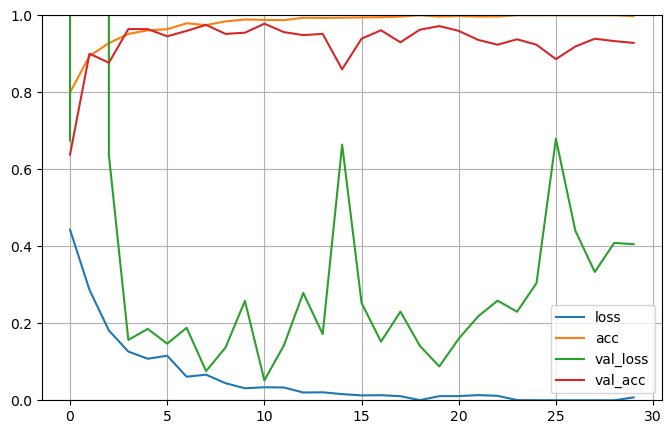

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
print(history.history)

{'loss': [0.44309431314468384, 0.2869648337364197, 0.1812211573123932, 0.12651096284389496, 0.10786201804876328, 0.1157383844256401, 0.06119677051901817, 0.06647708266973495, 0.044401347637176514, 0.03114236146211624, 0.033834442496299744, 0.03318607062101364, 0.020220689475536346, 0.020720381289720535, 0.016031069681048393, 0.012695390731096268, 0.013217095285654068, 0.01057950034737587, 0.0003161847998853773, 0.01075119711458683, 0.0107885105535388, 0.01343249250203371, 0.01157565787434578, 0.0005356255569495261, 0.0001399658212903887, 8.542523573851213e-05, 6.082910840632394e-05, 4.104323306819424e-05, 8.962802894529887e-06, 0.007505811285227537], 'acc': [0.7995744943618774, 0.8940425515174866, 0.9276595711708069, 0.9514893889427185, 0.9608510732650757, 0.9638298153877258, 0.9791489243507385, 0.9744681119918823, 0.984255313873291, 0.988936185836792, 0.9880850911140442, 0.9872340559959412, 0.9936169981956482, 0.9931914806365967, 0.9936169981956482, 0.994468092918396, 0.99489361047744

In [18]:
hist_df=pd.DataFrame(history.history)

In [19]:
hist_csv_file='history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    


In [24]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=2,
    class_mode='binary'
)

Found 845 images belonging to 2 classes.


In [25]:
model.evaluate(test_generator,steps=len(test_generator))

423/423 [==============================] - 31s 71ms/step - loss: 30.8388 - acc: 0.3609


[30.838760375976562, 0.36094674468040466]